In [124]:
import pandas as pd
import time
from datetime import datetime, timedelta
import numpy as np; np.random.seed(0)
import warnings
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme()
import datetime
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns





In [125]:
df = pd.read_csv('main_dataframe.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2548 non-null   int64  
 1   Date                   2548 non-null   object 
 2   NVDA Open              2548 non-null   float64
 3   NVDA High              2548 non-null   float64
 4   NVDA Low               2548 non-null   float64
 5   NVDA Close             2548 non-null   float64
 6   NVDA Volume            2548 non-null   int64  
 7   NVDA Daily change      2548 non-null   float64
 8   NVDA Daily change Max  2548 non-null   float64
 9   AAPL Open              2548 non-null   float64
 10  AAPL High              2548 non-null   float64
 11  AAPL Low               2548 non-null   float64
 12  AAPL Close             2548 non-null   float64
 13  AAPL Volume            2548 non-null   float64
 14  AAPL Daily change      2548 non-null   float64
 15  AAPL

In [126]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [127]:
df.describe(include='all')

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Volume,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max
count,2548,2548.000000,2548.000000,2548.000000,2548.000000,2.548000e+03,2548.000000,2548.000000,2548.000000,2548.000000,...,2.548000e+03,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2.548000e+03,2548.000000,2548.000000
unique,2548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"May 06, 2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,51.714800,52.619717,50.701456,51.679737,4.463448e+07,0.033639,3.074971,52.037374,52.596731,...,3.442481e+07,0.042622,1.837007,39.242857,39.665962,38.834215,39.258611,3.115764e+07,0.057296,2.057388
std,NaN,69.707221,71.075135,68.077964,69.579605,2.584339e+07,2.121161,1.855267,43.445427,43.986220,...,1.810103e+07,1.233471,1.098331,12.420214,12.604412,12.228679,12.412998,1.636571e+07,1.381609,1.238661
min,NaN,2.870000,2.910000,2.790000,2.850000,4.564400e+06,-10.580964,0.723327,13.160000,13.260000,...,7.425600e+06,-5.924658,0.375509,19.520000,19.550000,19.230000,19.360000,5.893800e+06,-6.818865,0.476417
25%,NaN,4.620000,4.670000,4.577500,4.620000,2.799570e+07,-1.048411,1.848530,23.490000,23.677500,...,2.306392e+07,-0.599056,1.167640,28.092500,28.387500,27.837500,28.185000,2.077245e+07,-0.680199,1.315414
50%,NaN,25.080000,25.530000,24.845000,25.190000,3.854270e+07,0.000000,2.565034,32.555000,32.855000,...,3.010960e+07,0.037801,1.548667,35.980000,36.240000,35.575000,35.925000,2.723295e+07,0.071017,1.766775
75%,NaN,61.770000,62.500000,60.650000,61.620000,5.385860e+07,1.145639,3.719994,56.210000,56.737500,...,4.053388e+07,0.730226,2.163127,49.952500,50.735000,49.410000,50.010000,3.635135e+07,0.774221,2.447132


In [131]:
df.dropna(inplace = True, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 0 to 2547
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   2548 non-null   datetime64[ns]
 1   NVDA Open              2548 non-null   float64       
 2   NVDA High              2548 non-null   float64       
 3   NVDA Low               2548 non-null   float64       
 4   NVDA Close             2548 non-null   float64       
 5   NVDA Volume            2548 non-null   int64         
 6   NVDA Daily change      2548 non-null   float64       
 7   NVDA Daily change Max  2548 non-null   float64       
 8   AAPL Open              2548 non-null   float64       
 9   AAPL High              2548 non-null   float64       
 10  AAPL Low               2548 non-null   float64       
 11  AAPL Close             2548 non-null   float64       
 12  AAPL Volume            2548 non-null   float64       
 13  AAP

In [132]:
df.to_csv('main_dataframe.csv')

In [133]:
df['Date'] = pd.to_datetime(df['Date']).copy()
df["Date"]= pd.to_datetime(df.Date,format="%Y-%m-%d").copy()
#df['Date'] = pd.to_numeric(pd.to_datetime(df['Date'])).copy()
i = 0
df["Day"] = 0 
while i  < 2548:
    temp = pd.Timestamp(df["Date"][i])
    df['Day'][i] = temp.dayofweek
    i=i+1

C:\Users\vovik\AppData\Local\Temp/ipykernel_8436/2865060975.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'][i] = temp.dayofweek


In [134]:
df.head()

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max,Day
0,2022-05-06,187.36,195.12,179.90,186.75,63299300,-0.325576,8.460256,156.01,159.44,...,-0.029111,2.941719,44.49,45.15,43.84,44.30,40910000.0,-0.427062,2.988139,4
1,2022-05-04,194.00,198.25,191.33,196.02,47575100,1.041237,3.616788,159.67,166.48,...,-0.767714,1.420667,45.06,46.64,44.41,46.54,44625600.0,3.284510,5.021392,2
2,2022-05-03,185.41,195.74,183.91,195.33,57204900,5.350305,6.432494,158.15,160.71,...,2.434194,3.156904,44.79,45.49,44.23,45.06,40158400.0,0.602813,2.848745,1
3,2022-05-02,194.02,201.28,185.17,185.47,50001100,-4.406762,8.700113,156.71,158.23,...,-3.842556,4.839060,43.72,44.99,43.51,44.96,45446500.0,2.836231,3.401517,0
4,2022-04-29,189.67,200.37,184.90,197.82,57032700,4.296937,8.366685,161.84,166.20,...,1.556857,3.382363,44.99,45.36,43.50,43.59,70726300.0,-3.111803,4.275862,4


C:\Users\vovik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='TSLA Daily change'>

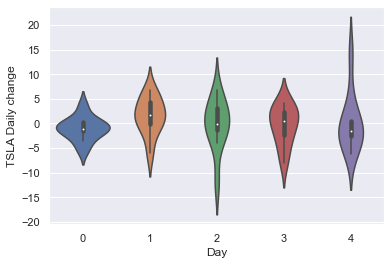

In [135]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])
tdf.drop(tdf.index[50:2548], inplace=True)
sns.violinplot(tdf.Day , tdf['TSLA Daily change'])

<AxesSubplot:>

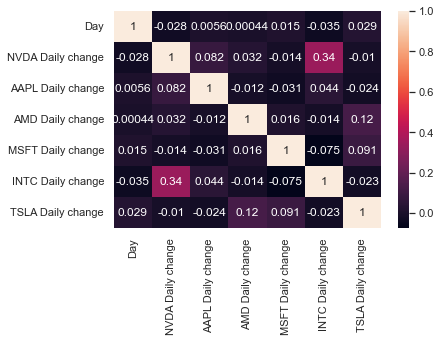

In [136]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])

#tdf.drop(tdf.index[300:2548], inplace=True)

#tdf.tail()


sns.heatmap(tdf.corr(), annot=True)

In [137]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 0 to 2547
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                2548 non-null   int64  
 1   NVDA Daily change  2548 non-null   float64
 2   AAPL Daily change  2548 non-null   float64
 3   AMD Daily change   2548 non-null   float64
 4   MSFT Daily change  2548 non-null   float64
 5   INTC Daily change  2548 non-null   float64
 6   TSLA Daily change  2548 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 223.8 KB


<AxesSubplot:>

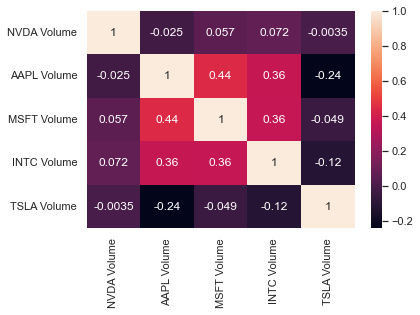

In [139]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','AAPL Volume','AMD Volume','MSFT Volume','INTC Volume','TSLA Volume'])
sns.heatmap(tdf.corr(), annot=True)


<AxesSubplot:>

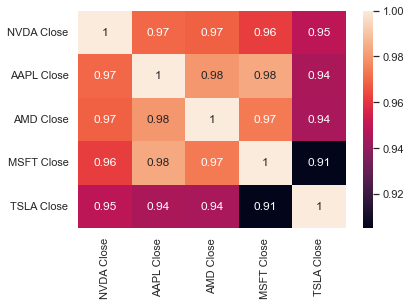

In [59]:
tdf = pd.DataFrame(df, columns = ['NVDA Close','AAPL Close','AMD Close','MSFT Close','TSLA Close'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

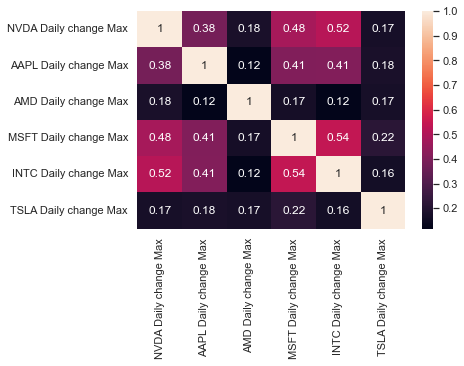

In [60]:
tdf = pd.DataFrame(df, columns = ['NVDA Daily change Max','AAPL Daily change Max','AMD Daily change Max','MSFT Daily change Max','INTC Daily change Max','TSLA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

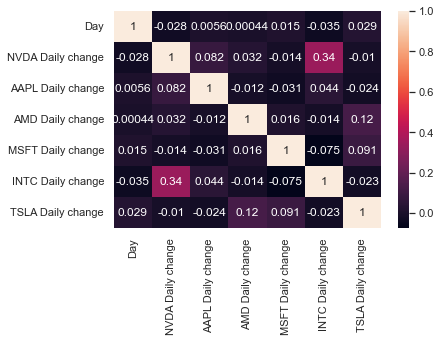

In [22]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

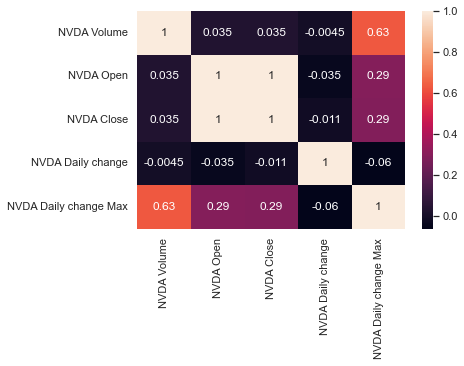

In [23]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','NVDA Open','NVDA Close','NVDA Daily change','NVDA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

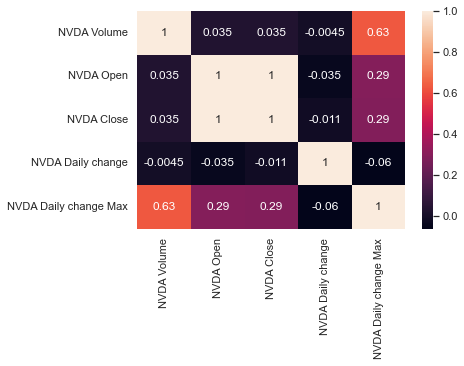

In [64]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','NVDA Open','NVDA Close','NVDA Daily change','NVDA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)